Introduction to TMDB Data Analysis
Overview
The TMDB dataset is a comprehensive repository of movie-related information, encompassing details about film releases, genres, ratings, and more. Conducting an analysis of this dataset provides valuable insights into trends, audience preferences, and the performance of movies over time.

Objectives
Understanding Movie Trends: Explore temporal patterns in movie releases, genres, and audience engagement metrics.
Identifying Popular Genres: Determine the most popular genres across different periods and their evolution.
Correlating Attributes: Investigate relationships between attributes like budget, revenue, and popularity to discern potential trends or dependencies.
Informing Decision-Making: Provide insights that could aid industry stakeholders, filmmakers, or production houses in strategic decision-making.
Dataset Overview
The TMDB dataset contains a vast array of attributes for numerous movies, such as release year, genres, budget, revenue, popularity scores, and more. Leveraging this data allows us to uncover patterns, correlations, and trends that contribute to a deeper understanding of the movie industry landscape.

Methodology
Our analysis involves exploratory data techniques, statistical analysis, and data visualization methods to extract meaningful insights. By employing these methodologies, we aim to derive actionable findings that can guide various stakeholders within the film industry.

Importance
Understanding the dynamics of movie trends and audience preferences is crucial in an ever-evolving entertainment landscape. This analysis aims to shed light on the factors contributing to movie success, genre popularity, and the changing preferences of audiences over time.

Step 1: Ask questions
1.	What is the overall structure of the dataset, and how many records and features does it contain?
2.	What are the data types of different columns, and are there any conversions needed?
3.	Are there duplicates in the dataset, and how should they be addressed?
4.	What are the summary statistics for key variables in the dataset?
5.	Are there any time-based trends or patterns in the data?
6.	Are there any correlations or relationships between different variables?
7.	What are the top-rated movies in terms of user ratings?
8.	Is there a correlation between the budget and revenue of movies?
9.	Which genres are the most popular among the movies in the dataset?
10.	Can we identify any trends in user ratings over the years?
11. which is the best movies in the data set
12. Which genres are most popular from year to year? 
13. What kinds of properties are associated with movies that have high revenues?


In [91]:
#Data Assessment:
#Load the data, check the first few rows, data types, column names, and basic statistics.
#Wrangle data
#import NumPy, Pandas, Matplotlib and Seaborn appropriately bellow
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
# import re
import ast
from IPython.display import display, HTML
import warnings

 see how the data looks like.

In [92]:
#Loading the  Dataset
tmdb = pd.read_csv("./tmdb-movies (2).csv")
tmdb.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [93]:
# Display last few rows
print(tmdb.tail())

          id    imdb_id  popularity  budget  revenue  \
10861     21  tt0060371    0.080598       0        0   
10862  20379  tt0060472    0.065543       0        0   
10863  39768  tt0060161    0.065141       0        0   
10864  21449  tt0061177    0.064317       0        0   
10865  22293  tt0060666    0.035919   19000        0   

                 original_title  \
10861        The Endless Summer   
10862                Grand Prix   
10863       Beregis Avtomobilya   
10864    What's Up, Tiger Lily?   
10865  Manos: The Hands of Fate   

                                                    cast homepage  \
10861  Michael Hynson|Robert August|Lord 'Tally Ho' B...      NaN   
10862  James Garner|Eva Marie Saint|Yves Montand|Tosh...      NaN   
10863  Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...      NaN   
10864  Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...      NaN   
10865  Harold P. Warren|Tom Neyman|John Reynolds|Dian...      NaN   

                 director            

In [94]:
# Summary of data types and missing values
print(tmdb.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [95]:
# Summary statistics of numerical columns
print(tmdb.describe())

                  id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.8129

In [96]:
print(tmdb.shape)

(10866, 21)


In [97]:
#cheack datatypes and samuury stastices
tmdb.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

Check for Missing Values: 
Identify columns with missing values and decide how to handle them (remove rows/columns, impute values, etc.).

In [98]:
# Check for missing values
print(tmdb.isnull().sum())

# Handle missing values based on your strategy
# Example: Drop rows with missing values
df_cleaned = tmdb.dropna()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


Data Cleaning:
 Duplicated Data: Check for and remove duplicated rows.

In [99]:
# Check for duplicates
print(tmdb.duplicated().sum())

# Remove duplicates
df = tmdb.drop_duplicates()

1


In [100]:
# Detect and handle outliers (e.g., using IQR, Z-score, domain knowledge)


In [101]:
tmdb.production_companies.unique()

array(['Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu',
       'Village Roadshow Pictures|Kennedy Miller Productions',
       'Summit Entertainment|Mandeville Films|Red Wagon Entertainment|NeoReel',
       ...,
       'Cherokee Productions|Joel Productions|Douglas & Lewis Productions',
       'Benedict Pictures Corp.', 'Norm-Iris'], dtype=object)

Now, I will analyse the movies according to the production_companies.

In [102]:
tmdb.production_companies.value_counts()

production_companies
Paramount Pictures                       156
Universal Pictures                       133
Warner Bros.                              84
Walt Disney Pictures                      76
Columbia Pictures                         72
                                        ... 
Silverwood Films                           1
Lunch Box Entertainment                    1
Atitude ProduÃ§Ãµes e Empreendimentos      1
Mulmur Feed Company                        1
Norm-Iris                                  1
Name: count, Length: 7445, dtype: int64

In [103]:
companies_count = tmdb.production_companies.value_counts().to_frame().reset_index()
companies_count.columns = ["production_companies","total"]
companies_count.head()

,production_companies,total
0,Paramount Pictures,156
1,Universal Pictures,133
2,Warner Bros.,84
3,Walt Disney Pictures,76
4,Columbia Pictures,72


There are a lot more Paramount entries, as expected, so I will analyse the overall number of movies in two ways: comparing Paramount movies with the rest and comparing the data without the Paramount movies.

In [104]:
companies_total = tmdb["production_companies"].value_counts()
total = companies_total.sum()
total_Paramount = companies_total.loc["Paramount Pictures"]
total_others = total - total_Paramount 
print(total_Paramount, total_others)

156 9680


In [105]:
data = {
    'companies' : ['Paramount','others'],
    'total' : [total_Paramount, total_others]

}

data = pd.DataFrame(data)
data

,companies,total
0,Paramount,156
1,others,9680


<Axes: xlabel='companies', ylabel='total'>

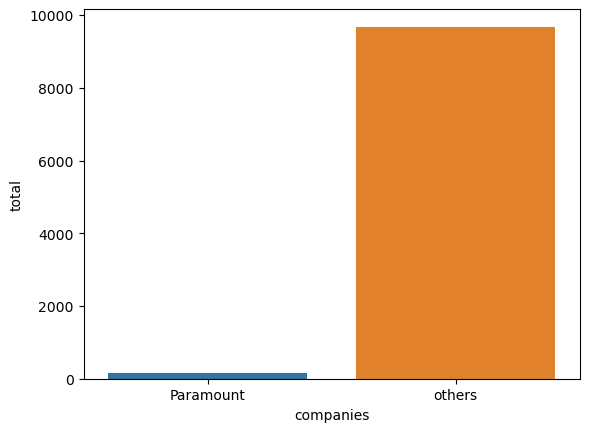

In [106]:
sns.barplot(data = data, x = 'companies', y='total')

([<matplotlib.patches.Wedge at 0x1a1a73f00d0>,
 [Text(1.0986348364111864, 0.05478591263970899, 'Paramount'),
  Text(-1.0986348322435235, -0.05478599621477238, 'others')])

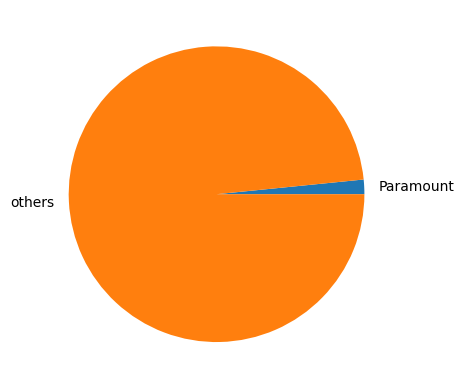

In [107]:
plt.pie(data.total, labels = data.companies)

In [111]:
df = tmdb[['genres','production_companies']]

df.head()

,genres,production_companies
0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...
1,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...
2,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...
3,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot
4,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...


In [112]:
tmdb.genres.value_counts()

genres
Comedy                                      712
Drama                                       712
Documentary                                 312
Drama|Romance                               289
Comedy|Drama                                280
                                           ... 
Adventure|Animation|Romance                   1
Family|Animation|Drama                        1
Action|Adventure|Animation|Comedy|Family      1
Action|Adventure|Animation|Fantasy            1
Mystery|Science Fiction|Thriller|Drama        1
Name: count, Length: 2039, dtype: int64

In [114]:
# Assuming your dataset has columns like 'release_year', 'genres', and 'popularity'

# Group the data by 'release_year' and find the most popular genre for each year
most_popular_genre_by_year = tmdb.groupby('release_year').apply(lambda x: x.loc[x['popularity'].idxmax()]).reset_index(drop=True)

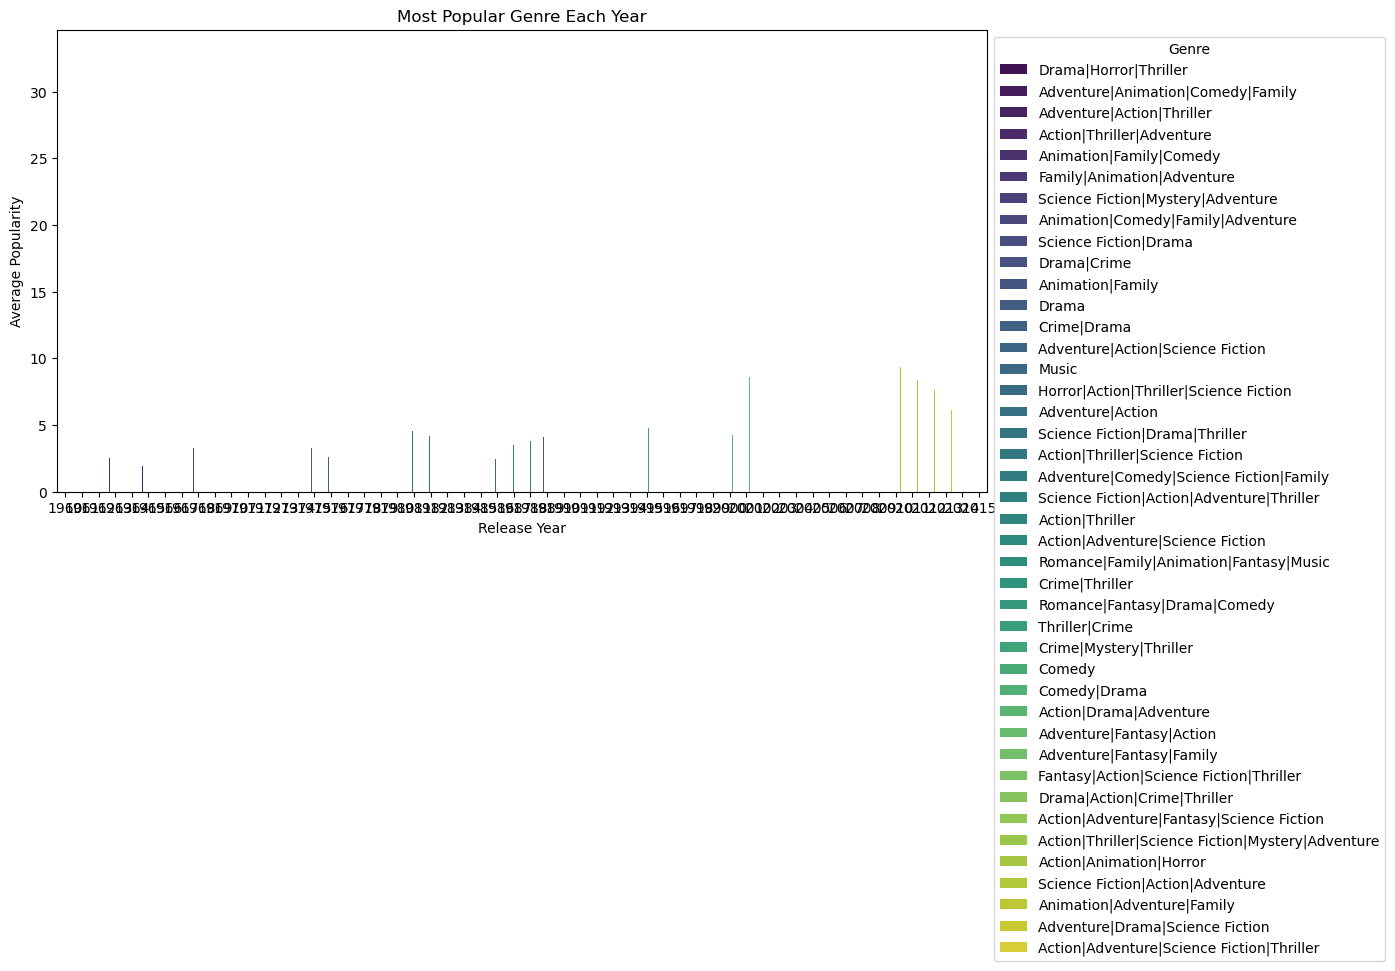

In [127]:


# Plot the most popular genre for each year
plt.figure(figsize=(12, 6))
sns.barplot(x="release_year" , y="popularity", hue="genres", data=most_popular_genre_by_year, palette='viridis')
plt.title('Most Popular Genre Each Year')
plt.xlabel('Release Year')
plt.ylabel('Average Popularity')
plt.legend(title='Genre', bbox_to_anchor=(1, 1), loc='upper left')
#plt.tight_layout()
plt.show()

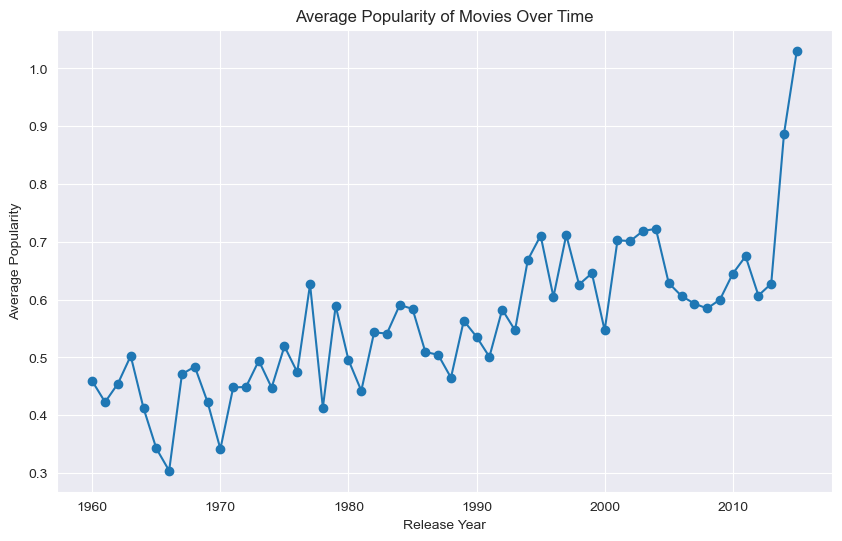

In [ ]:
avg_popularity_by_year = tmdb.groupby('release_year')['popularity'].mean()

# Plotting average popularity over the release_year
plt.figure(figsize=(10, 6))
plt.plot(avg_popularity_by_year.index, avg_popularity_by_year.values, marker='o', linestyle='-')
plt.title('Average Popularity of Movies Over Time')
plt.xlabel('Release Year')
plt.ylabel('Average Popularity')
plt.grid(True)
plt.show()

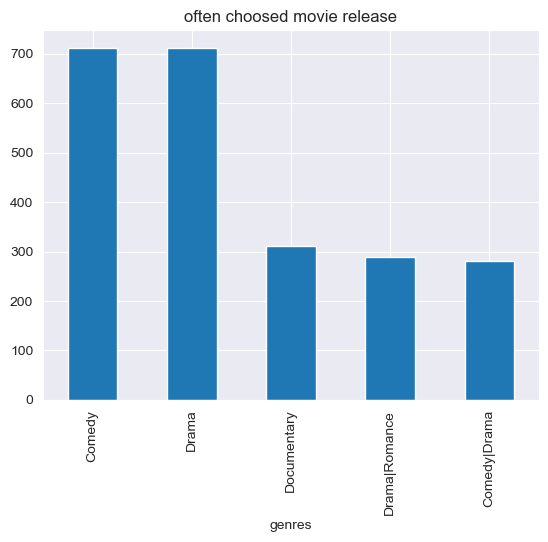

In [ ]:
tmdb['genres'].value_counts()[:5].plot(kind = 'bar')
plt.title('often choosed movie release')
plt.show()

In [ ]:
# Plotting revenue vs budget
plt.figure(figsize=(8, 6))
plt.scatter(tmdb['budget'], tmdb['revenue'], alpha=0.5)
plt.title('Correlation between Revenue and Budget')
plt.xlabel('genres')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

In [ ]:
non_Paramount = tmdb.query("production_companies != 'Paramount Pictures'").production_companies.value_counts().to_frame().reset_index()
non_Paramount.columns = ["production_companies","total"]
non_Paramount.head()

,production_companies,total
0,Universal Pictures,133
1,Warner Bros.,84
2,Walt Disney Pictures,76
3,Columbia Pictures,72
4,Metro-Goldwyn-Mayer (MGM),72


c:\Users\Student\anaconda4\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\Student\anaconda4\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 700x1000 with 0 Axes>

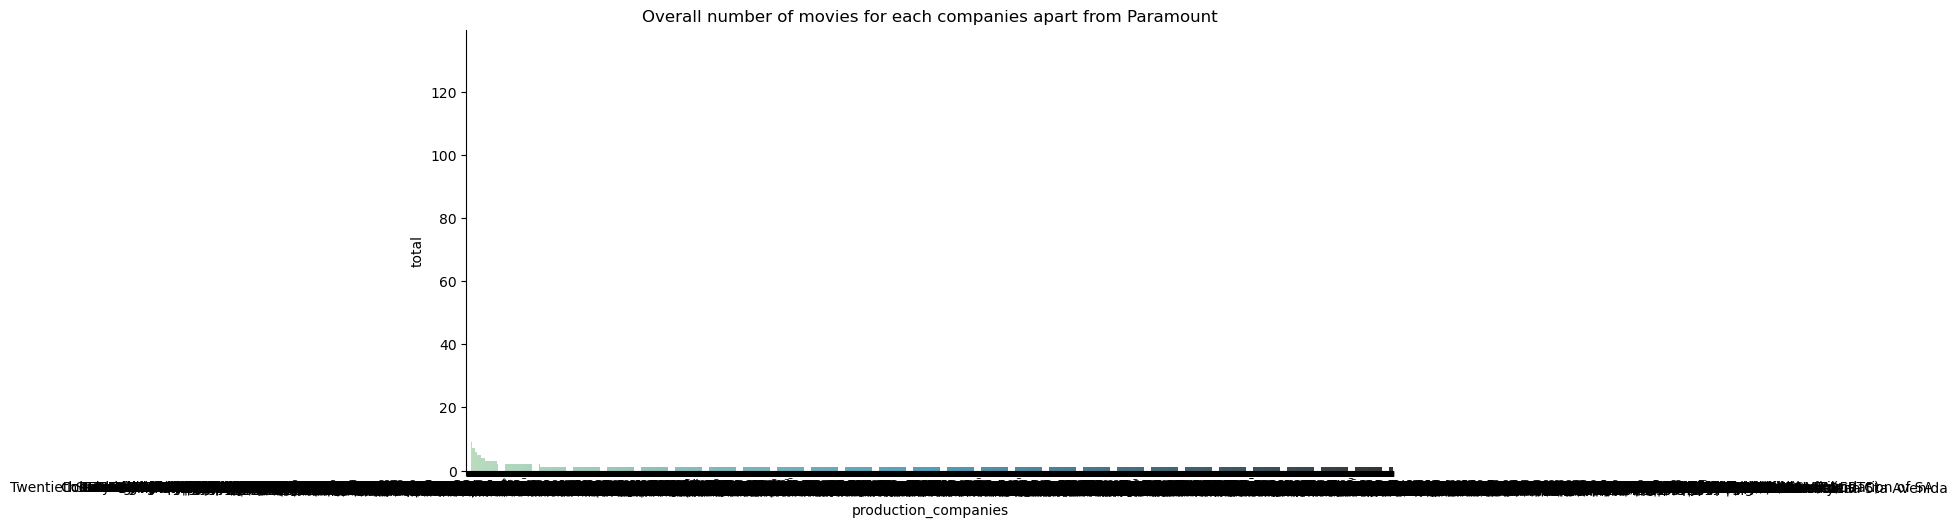

In [ ]:
plt.figure(figsize=(7,10))
sns.catplot(x = "production_companies",y = "total", data = non_Paramount,aspect=2,kind="bar",palette="GnBu_d").set(title='Overall number of movies for each companies apart from Paramount')


In [ ]:
tmdb.budget.describe()

count    1.086600e+04
mean     1.462570e+07
std      3.091321e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.500000e+07
max      4.250000e+08
Name: budget, dtype: float64

In [ ]:
tmdb.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [ ]:
df = tmdb[['budget','production_companies']]

df.head()

,budget,production_companies
0,150000000,Universal Studios|Amblin Entertainment|Legenda...
1,150000000,Village Roadshow Pictures|Kennedy Miller Produ...
2,110000000,Summit Entertainment|Mandeville Films|Red Wago...
3,200000000,Lucasfilm|Truenorth Productions|Bad Robot
4,190000000,Universal Pictures|Original Film|Media Rights ...


In [ ]:
df_drop = df.query('budget == 0').index
df.drop(df_drop,axis=0,inplace = True)
df.head()

C:\Users\Student\AppData\Local\Temp\ipykernel_11880\3746742273.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df_drop,axis=0,inplace = True)


,budget,production_companies
0,150000000,Universal Studios|Amblin Entertainment|Legenda...
1,150000000,Village Roadshow Pictures|Kennedy Miller Produ...
2,110000000,Summit Entertainment|Mandeville Films|Red Wago...
3,200000000,Lucasfilm|Truenorth Productions|Bad Robot
4,190000000,Universal Pictures|Original Film|Media Rights ...


In [ ]:
df_total = df.groupby("production_companies").sum().reset_index()
df_total_sorted = df_total.sort_values("budget",ascending=False).reset_index()
df_total_sorted

,index,production_companies,budget
0,2308,Paramount Pictures,2118504915
1,918,DreamWorks Animation,2047000000
2,3833,Walt Disney Pictures|Pixar Animation Studios,1857000000
3,537,Columbia Pictures,1679620000
4,1857,Marvel Studios,1371000000
...,...,...,...
4014,274,Bavaria Pictures|Grand Pictures|Picture Circle,3
4015,975,Dry County Films|Anchor Bay Entertainment|Movi...,1
4016,86,Alcon Entertainment|Dinamo Entertainment,1
4017,2440,Paramount Pictures|Nickelodeon Movies|Stella-d...,1


c:\Users\Student\anaconda4\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\Student\anaconda4\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


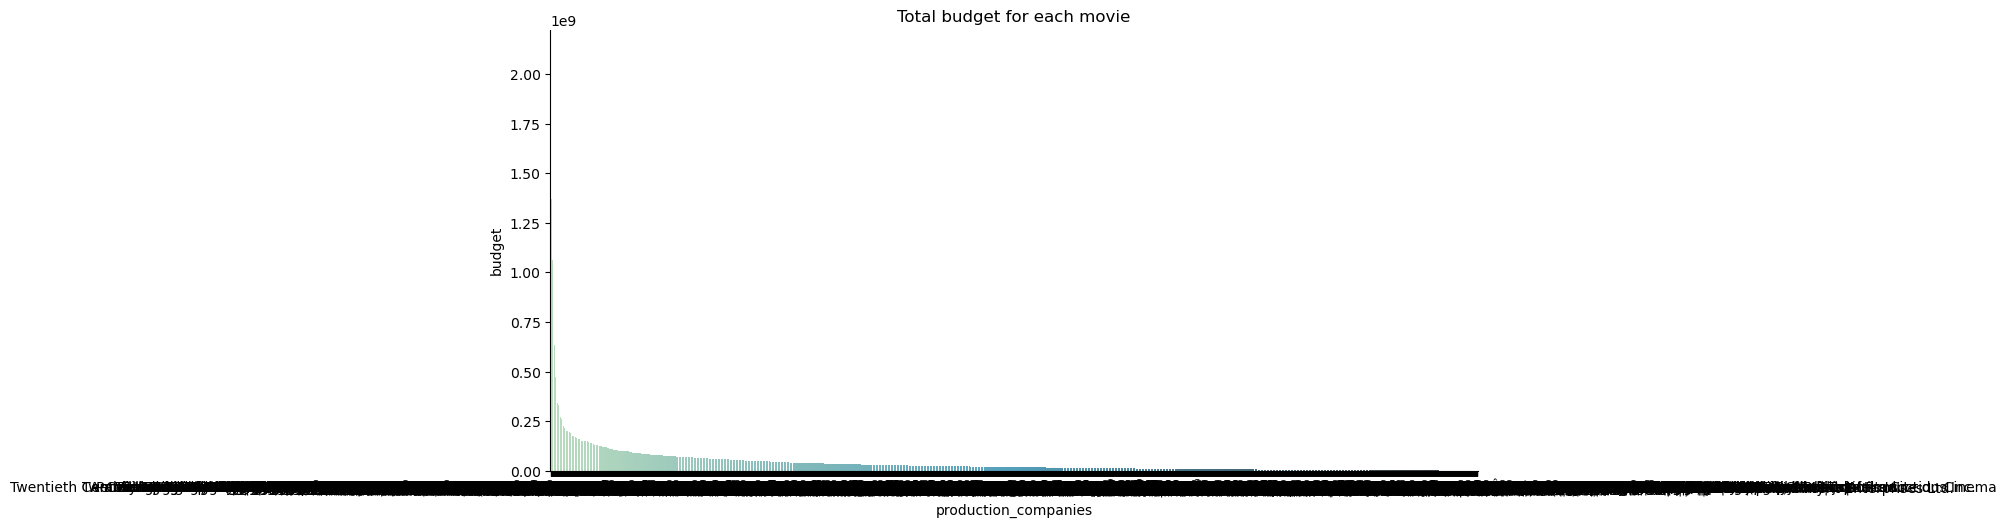

In [ ]:
sns.catplot(x = "production_companies",y = "budget", data = df_total_sorted,aspect=2,kind="bar",palette="GnBu_d").set(title='Total budget for each movie')

In [ ]:
df_non_Paramount =df.query("production_companies != 'Paramount Pictures'")
df_non_Paramount.head()

,budget,production_companies
0,150000000,Universal Studios|Amblin Entertainment|Legenda...
1,150000000,Village Roadshow Pictures|Kennedy Miller Produ...
2,110000000,Summit Entertainment|Mandeville Films|Red Wago...
3,200000000,Lucasfilm|Truenorth Productions|Bad Robot
4,190000000,Universal Pictures|Original Film|Media Rights ...


In [ ]:
df_total_2 = df_non_Paramount.groupby("production_companies").sum().reset_index()
df_total_sorted_2 = df_total_2.sort_values("budget",ascending=False).reset_index()
df_total_sorted_2

,index,production_companies,budget
0,918,DreamWorks Animation,2047000000
1,3832,Walt Disney Pictures|Pixar Animation Studios,1857000000
2,537,Columbia Pictures,1679620000
3,1857,Marvel Studios,1371000000
4,3449,Universal Pictures,1317633695
...,...,...,...
4013,274,Bavaria Pictures|Grand Pictures|Picture Circle,3
4014,975,Dry County Films|Anchor Bay Entertainment|Movi...,1
4015,86,Alcon Entertainment|Dinamo Entertainment,1
4016,2439,Paramount Pictures|Nickelodeon Movies|Stella-d...,1


In [ ]:
sns.catplot(x = "production_companies",y = "budget", data = df_total_sorted_2,aspect=2,kind="bar",palette="GnBu_d").set(title='Total budget of movies for each oproduction_companies, except Paramount speking ones')

In [ ]:
bud_mean = df.groupby("production_companies").mean().reset_index()
bud_mean_sorted = bud_mean.sort_values("budget",ascending=False).reset_index()
bud_mean_sorted

,index,production_companies,budget
0,357,Boram Entertainment Inc.,425000000.0
1,3820,Walt Disney Pictures|Jerry Bruckheimer Films|M...,380000000.0
2,1860,Marvel Studios|Prime Focus|Revolution Sun Studios,280000000.0
3,778,DC Comics|Legendary Pictures|Warner Bros.|Bad ...,270000000.0
4,664,Columbia Pictures|Laura Ziskin Productions|Mar...,258000000.0
...,...,...,...
4014,2407,Paramount Pictures|Laurel Productions|Darkside...,3.0
4015,2440,Paramount Pictures|Nickelodeon Movies|Stella-d...,1.0
4016,86,Alcon Entertainment|Dinamo Entertainment,1.0
4017,3,120dB Films|Scion Films|Voodoo Production Serv...,1.0


c:\Users\Student\anaconda4\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\Student\anaconda4\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


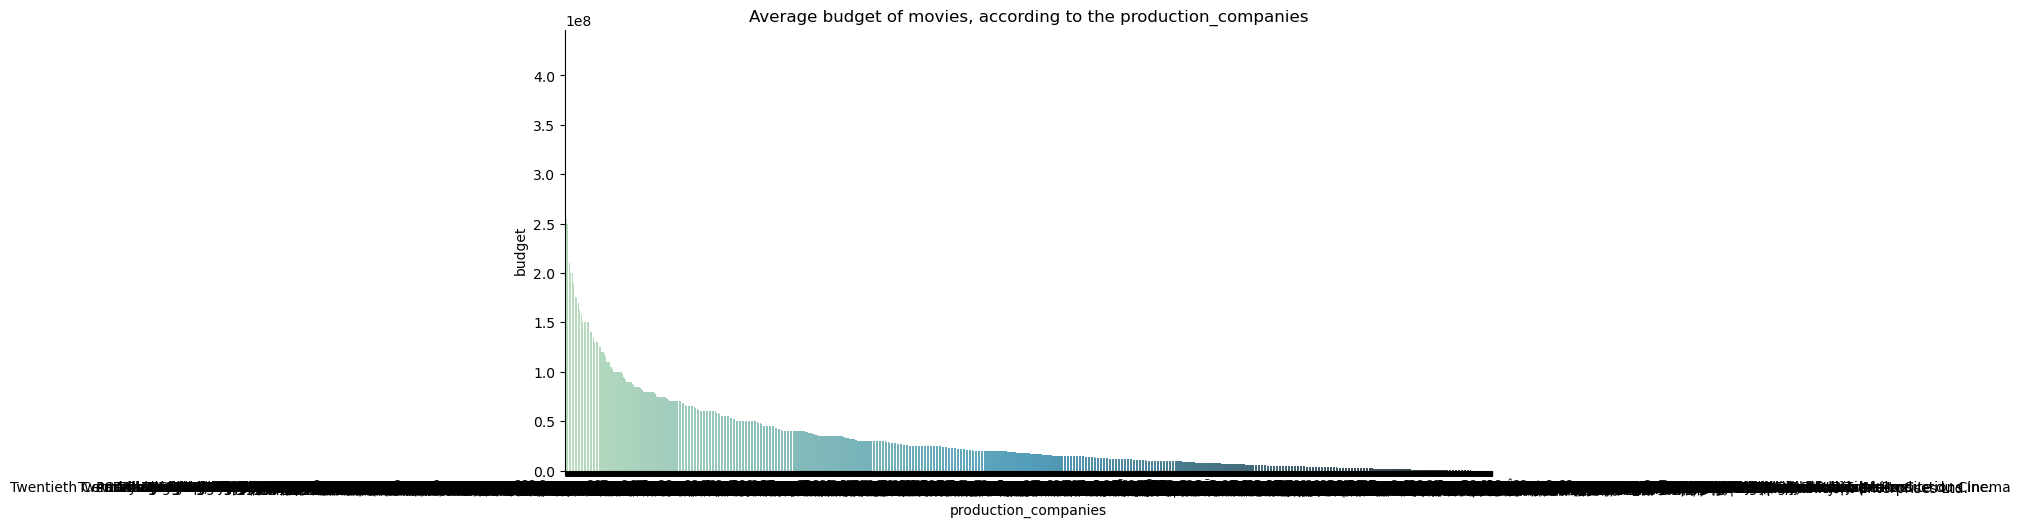

In [ ]:
sns.catplot(x = "production_companies",y = "budget", data = bud_mean_sorted,aspect=2,kind="bar",palette="GnBu_d").set(title = 'Average budget of movies, according to the production_companies')

In [ ]:
tmdb.vote_average.describe()

count    10866.000000
mean         5.974922
std          0.935142
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64

In [ ]:
df2 = tmdb[['vote_average','production_companies']]

df2.head()

,vote_average,production_companies
0,6.5,Universal Studios|Amblin Entertainment|Legenda...
1,7.1,Village Roadshow Pictures|Kennedy Miller Produ...
2,6.3,Summit Entertainment|Mandeville Films|Red Wago...
3,7.5,Lucasfilm|Truenorth Productions|Bad Robot
4,7.3,Universal Pictures|Original Film|Media Rights ...


In [ ]:
df2_mean = df2.groupby("production_companies").mean().reset_index()
df2_mean_sorted = df2_mean.sort_values("vote_average",ascending=False).reset_index()
df2_mean_sorted

,index,production_companies,vote_average
0,5274,SMV Enterprises|Columbia Music Video|EMI,8.7
1,1974,Edel records GmbH,8.5
2,3872,Miramax Films|British Film Institute (BFI),8.5
3,5068,Red Bull Media House|Brain Farm Digital Cinema,8.5
4,5858,Talking Heads|Arnold Stiefel Company,8.4
...,...,...,...
7440,6051,Threshold Entertainment|Lions Gate Family Ente...,2.2
7441,1541,Crystal Sky Worldwide|Triumph Films,2.1
7442,5234,Rogue State|Remember Dreaming Productions|Litt...,2.1
7443,1905,Dudez Productions,2.0


In [ ]:
plt.figure(figsize=(5,10))
sns.catplot(x = "production_companies",y = "vote_average", data = df2_mean_sorted,aspect=2,kind="bar",palette="GnBu_d").set(title='Average voting of movies for each production_companies')

NameError: name 'df2_mean_sorted' is not defined

<Figure size 500x1000 with 0 Axes>

In [ ]:
# Best movies of the data set
tmdb[(tmdb['vote_count']>=3000) & (tmdb['vote_average']>=5.5) & (tmdb['popularity']>=10)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
629,157336,tt0816692,24.949134,165000000,621752480,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,http://www.interstellarmovie.net/,Christopher Nolan,Mankind was born on Earth. It was never meant ...,...,Interstellar chronicles the adventures of a gr...,169,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,11/5/14,6498,8.0,2014,1.519800e+08,5.726906e+08
630,118340,tt2015381,14.311205,170000000,773312399,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,http://marvel.com/guardians,James Gunn,All heroes start somewhere.,...,"Light years from Earth, 26 years after being a...",121,Action|Science Fiction|Adventure,Marvel Studios|Moving Picture Company (MPC)|Bu...,7/30/14,5612,7.9,2014,1.565855e+08,7.122911e+08
631,100402,tt1843866,12.971027,170000000,714766572,Captain America: The Winter Soldier,Chris Evans|Scarlett Johansson|Sebastian Stan|...,http://www.captainamericathewintersoldiermovie...,Joe Russo|Anthony Russo,In heroes we trust.,...,After the cataclysmic events in New York with ...,136,Action|Adventure|Science Fiction,Marvel Studios,3/20/14,3848,7.6,2014,1.565855e+08,6.583651e+08
633,131631,tt1951265,10.739009,125000000,752100229,The Hunger Games: Mockingjay - Part 1,Jennifer Lawrence|Josh Hutcherson|Liam Hemswor...,http://www.thehungergames.movie/,Francis Lawrence,Fire burns brighter in the darkness,...,Katniss Everdeen reluctantly becomes the symbo...,123,Science Fiction|Adventure|Thriller,Lionsgate|Color Force,11/18/14,3590,6.6,2014,1.151364e+08,6.927528e+08
634,122917,tt2310332,10.174599,250000000,955119788,The Hobbit: The Battle of the Five Armies,Martin Freeman|Ian McKellen|Richard Armitage|K...,http://www.thehobbit.com/,Peter Jackson,Witness the defining chapter of the Middle-Ear...,...,Immediately after the events of The Desolation...,144,Adventure|Fantasy,WingNut Films|New Line Cinema|3Foot7|Metro-Gol...,12/10/14,3110,7.1,2014,2.302728e+08,8.797523e+08
1329,11,tt0076759,12.037933,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,http://www.starwars.com/films/star-wars-episod...,George Lucas,"A long time ago in a galaxy far, far away...",...,Princess Leia is captured and held hostage by ...,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,3/20/77,4428,7.9,1977,3.957559e+07,2.789712e+09


In [ ]:
tmdb.popularity.describe()

count    10866.000000
mean         0.646441
std          1.000185
min          0.000065
25%          0.207583
50%          0.383856
75%          0.713817
max         32.985763
Name: popularity, dtype: float64

In [ ]:
pop = tmdb[['popularity','production_companies']]

pop.head()

,popularity,production_companies
0,32.985763,Universal Studios|Amblin Entertainment|Legenda...
1,28.419936,Village Roadshow Pictures|Kennedy Miller Produ...
2,13.112507,Summit Entertainment|Mandeville Films|Red Wago...
3,11.173104,Lucasfilm|Truenorth Productions|Bad Robot
4,9.335014,Universal Pictures|Original Film|Media Rights ...


In [ ]:
pop_mean = pop.groupby("production_companies").mean().reset_index()
pop_mean_sorted = pop_mean.sort_values("popularity",ascending=False).reset_index()
pop_mean_sorted

,index,production_companies,popularity
0,6823,Universal Studios|Amblin Entertainment|Legenda...,32.985763
1,6923,Village Roadshow Pictures|Kennedy Miller Produ...,28.419936
2,4650,Paramount Pictures|Legendary Pictures|Warner B...,24.949134
3,3706,Marvel Studios|Moving Picture Company (MPC)|Bu...,14.311205
4,5788,Summit Entertainment|Mandeville Films|Red Wago...,13.112507
...,...,...,...
7440,847,Bronson Avenue|Paramount Pictures Digital Ente...,0.001423
7441,944,Canal+|Chain Camera Pictures|ITVS|Rise Films|G...,0.001372
7442,5190,RhÃ´ne-Alpes CinÃ©ma|France2 CinÃ©ma,0.000973
7443,5330,School Pictures|Parting Shots Media|Logolite E...,0.000620


c:\Users\Student\anaconda4\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\Student\anaconda4\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 700x1000 with 0 Axes>

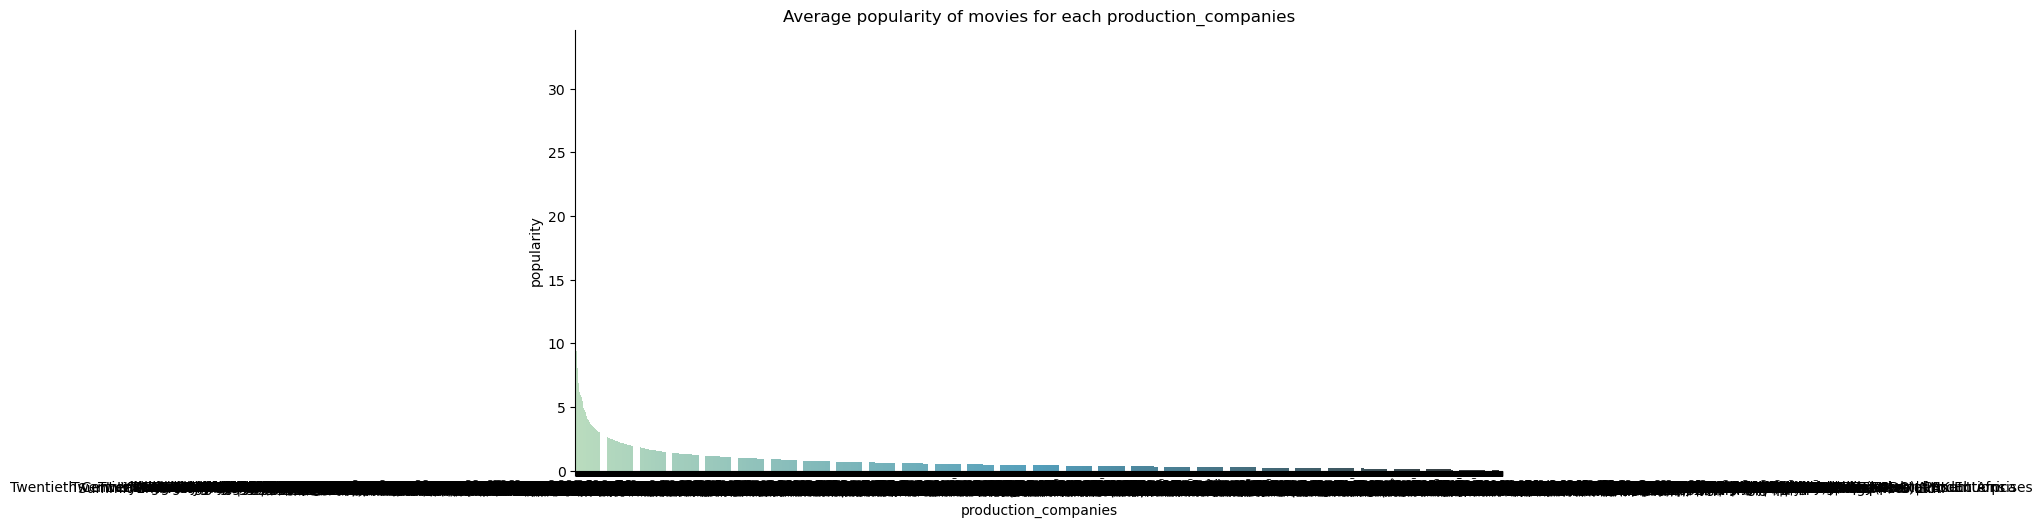

In [ ]:
plt.figure(figsize=(7,10))
sns.catplot(x = "production_companies",y = "popularity", data = pop_mean_sorted,aspect=2,kind="bar",palette="GnBu_d").set(title='Average popularity of movies for each production_companies')

Rewvenue

In [ ]:
tmdb.revenue.describe()

count    1.086600e+04
mean     3.982332e+07
std      1.170035e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.400000e+07
max      2.781506e+09
Name: revenue, dtype: float64

In [ ]:
rev = tmdb[['revenue','production_companies']]

rev.head()

,revenue,production_companies
0,1513528810,Universal Studios|Amblin Entertainment|Legenda...
1,378436354,Village Roadshow Pictures|Kennedy Miller Produ...
2,295238201,Summit Entertainment|Mandeville Films|Red Wago...
3,2068178225,Lucasfilm|Truenorth Productions|Bad Robot
4,1506249360,Universal Pictures|Original Film|Media Rights ...


In [ ]:
rev_mean = rev.groupby("production_companies").mean().reset_index()
rev_mean_sorted = rev_mean.sort_values("revenue",ascending=False).reset_index()
rev_mean_sorted

,index,production_companies,revenue
0,3039,Ingenious Film Partners|Twentieth Century Fox ...,2.781506e+09
1,3575,Lucasfilm|Truenorth Productions|Bad Robot,2.068178e+09
2,4753,Paramount Pictures|Twentieth Century Fox Film ...,1.845034e+09
3,6823,Universal Studios|Amblin Entertainment|Legenda...,1.513529e+09
4,6701,Universal Pictures|Original Film|Media Rights ...,1.506249e+09
...,...,...,...
7440,3109,Isle of Man Film Commission|British Broadcasti...,0.000000e+00
7441,3108,Isle of Man Film,0.000000e+00
7442,3107,Island Pictures|Enchanter Entertainment,0.000000e+00
7443,3106,Island Pictures|Black Snake|Grokenberger Film ...,0.000000e+00


c:\Users\Student\anaconda4\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\Student\anaconda4\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Error in callback <function _draw_all_if_interactive at 0x000001D0D4E3BBA0> (for post_execute):


KeyboardInterrupt: 

<Figure size 500x1000 with 0 Axes>

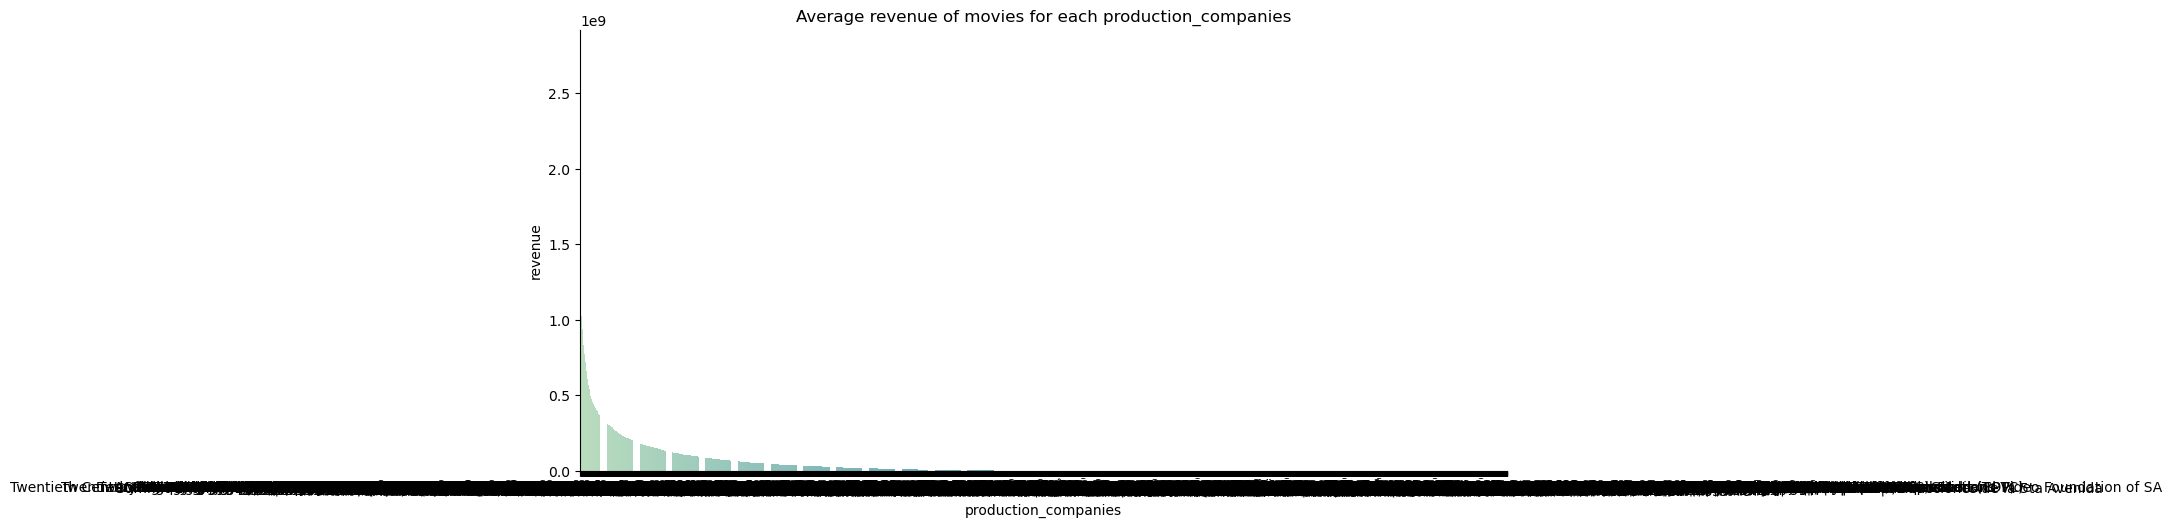

In [ ]:
plt.figure(figsize=(5,10))
sns.catplot(x = "production_companies",y = "revenue",data = rev_mean_sorted,aspect=2,kind="bar",palette="GnBu_d").set(title='Average revenue of movies for each production_companies' )

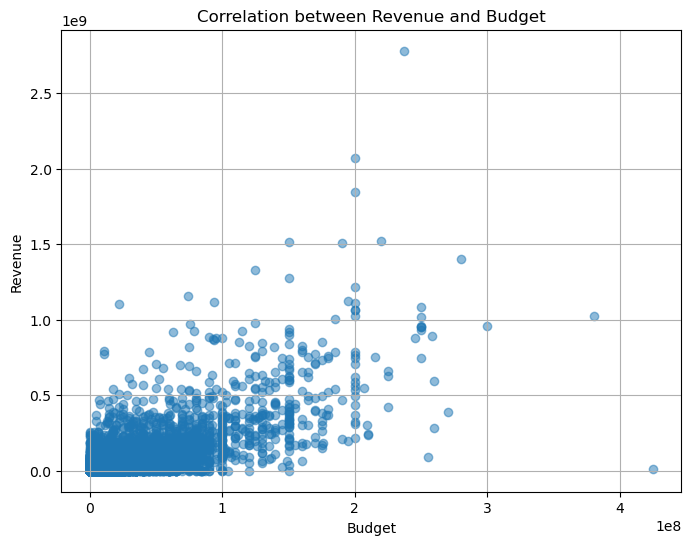

In [ ]:
# Plotting revenue vs budget
plt.figure(figsize=(8, 6))
plt.scatter(tmdb['budget'], tmdb['revenue'], alpha=0.5)
plt.title('Correlation between Revenue and Budget')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

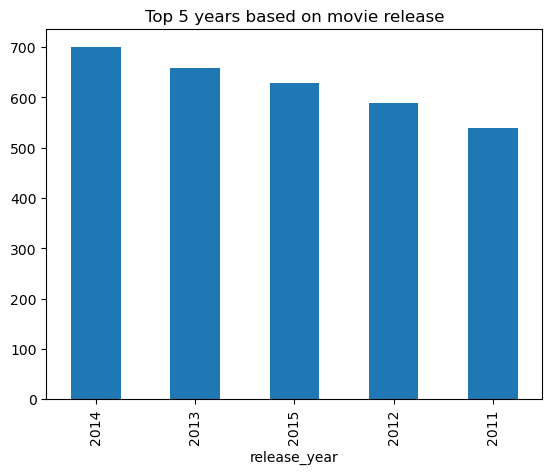

In [ ]:
#top 5 years based on move release
tmdb['release_year'].value_counts()[:5].plot(kind = 'bar')
plt.title('Top 5 years based on movie release')
plt.show()

In [ ]:
# Lets Find Those movies who were relesed between 2013 and 2015
movies_2000= tmdb[tmdb['release_year']>=2013][tmdb[tmdb['release_year']>=2013]['release_year']<=2015]
movies_2000.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [ ]:
movies_2000.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1988.000000,1988.000000,1.988000e+03,1.988000e+03,1988.000000,1988.000000,1988.000000,1988.000000,1.988000e+03,1.988000e+03
mean,235753.103622,0.846568,1.245301e+07,3.812738e+07,96.954225,303.405433,5.896328,2013.984909,1.153560e+07,3.528978e+07
std,75440.466948,1.706385,3.382755e+07,1.380049e+08,25.800879,716.965297,1.065004,0.804975,3.134094e+07,1.276442e+08
min,189.000000,0.000620,0.000000e+00,0.000000e+00,0.000000,10.000000,2.200000,2013.000000,0.000000e+00,0.000000e+00
25%,180311.750000,0.182121,0.000000e+00,0.000000e+00,88.000000,18.000000,5.200000,2013.000000,0.000000e+00,0.000000e+00
50%,246354.000000,0.369503,0.000000e+00,0.000000e+00,95.000000,43.000000,5.900000,2014.000000,0.000000e+00,0.000000e+00
75%,291209.250000,0.832799,6.000000e+06,2.463242e+06,107.000000,193.000000,6.700000,2015.000000,5.616200e+06,2.270821e+06
max,409696.000000,32.985763,2.800000e+08,2.068178e+09,400.000000,6882.000000,8.900000,2015.000000,2.575999e+08,1.902723e+09


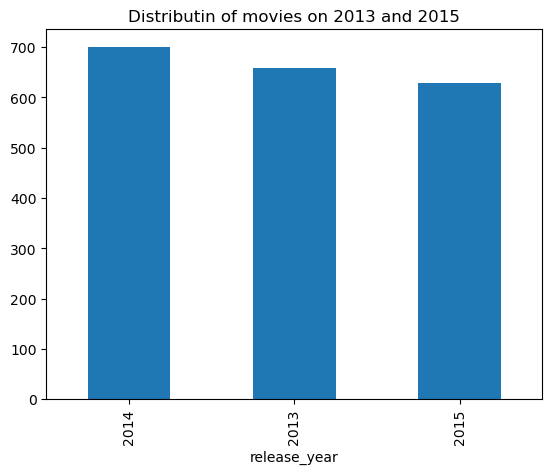

In [ ]:
movies_2000.value_counts('release_year')[:5].plot(kind = 'bar')
plt.title('Distributin of movies on 2013 and 2015')
plt.show()

c:\Users\Student\anaconda4\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


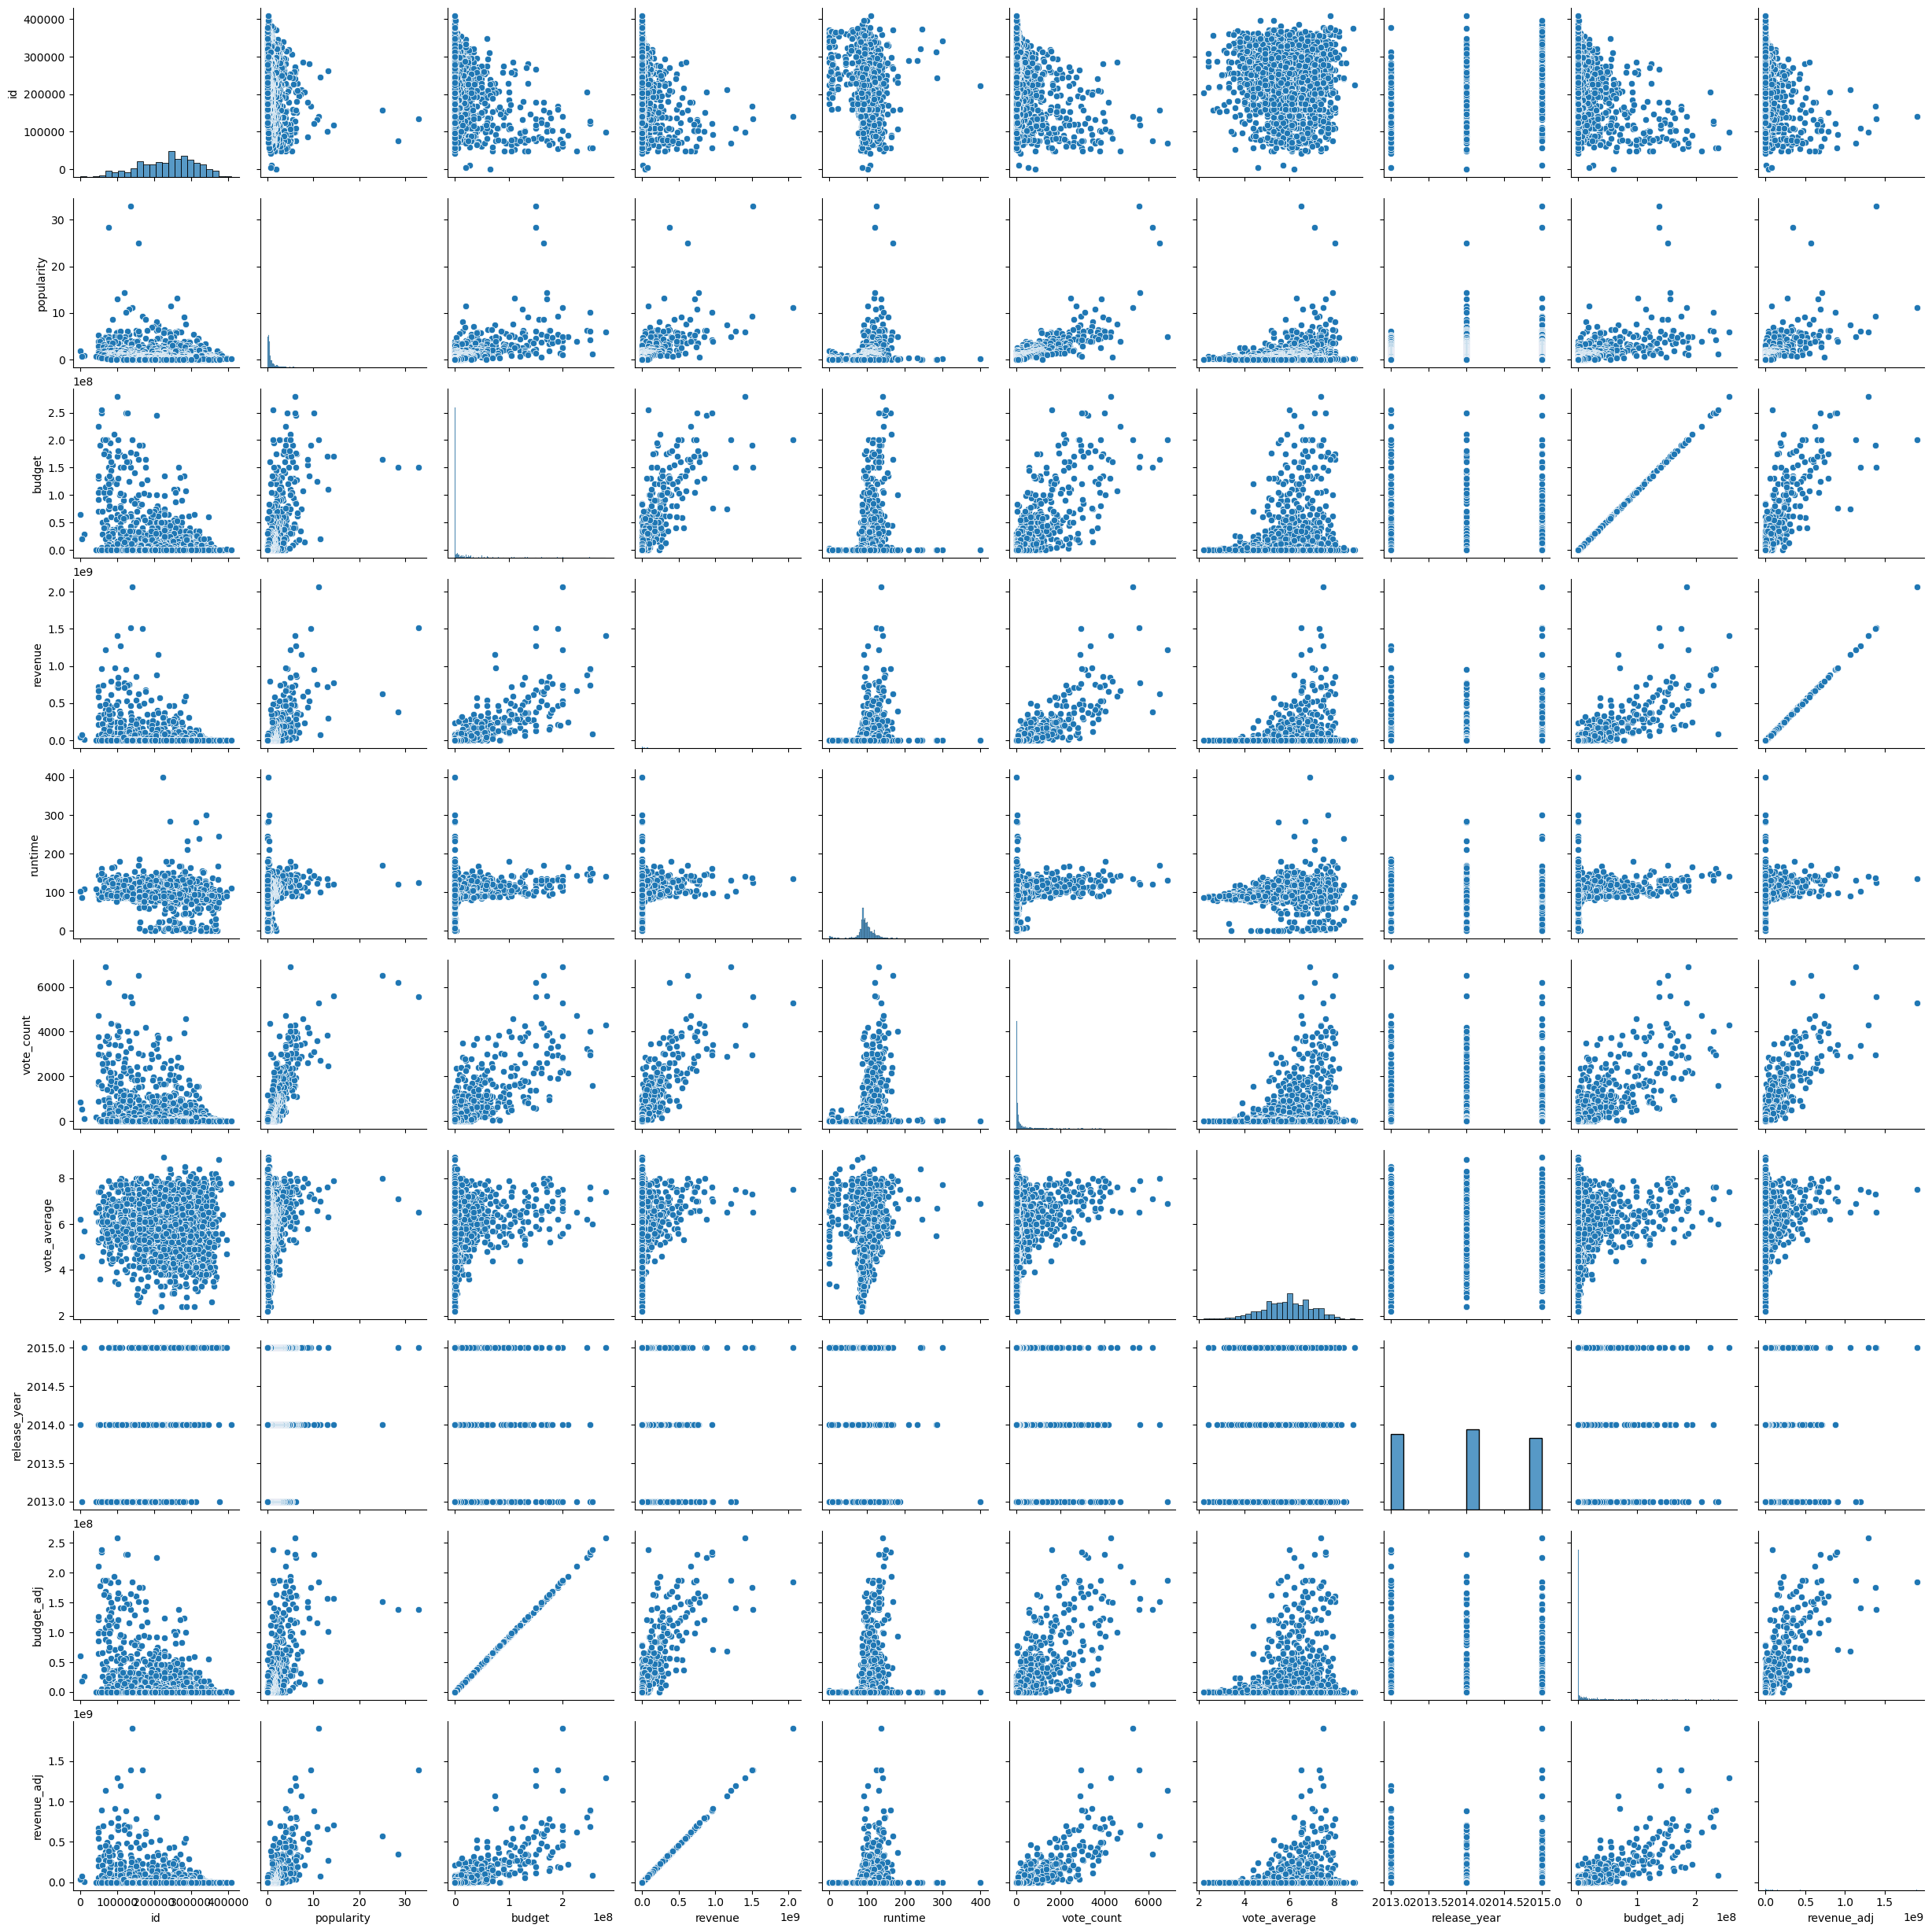

In [ ]:
sns.pairplot(movies_2000)

Conclusions
Reflecting on Data Exploration Steps
The analysis embarked on a comprehensive journey through the dataset, delving into various facets to unravel insights. We examined trends over time, genre popularity, and correlations between different movie attributes.

Main Findings
The study unearthed intriguing patterns but with a cautious perspective. One significant observation was the apparent correlation between movie budgets and revenues. However, it's crucial to note that correlation doesn't imply causation. While higher budgets often coincided with higher revenues, this doesn't guarantee a causal relationship. There could be numerous influencing factors beyond budget that impact a movie's financial success.
Trends Over Time: Visualization of movie release trends across years using line graphs.
Genre Popularity: Bar charts showcasing the popularity of different movie genres over time.
Correlation Analysis: Scatter plots illustrating correlations between budget and revenue.

Areas for Further Research
Exploring additional dimensions could enhance the depth of understanding. Further investigation into audience preferences or marketing strategies could shed light on why certain genres or movies outperform others financially. Additionally, deeper analysis into the impact of specific directors or actors on movie success could provide valuable insights.

Limitations
An evident limitation of this analysis lies in the scope of available data. The dataset might lack granularity in capturing all influencing factors, potentially leading to oversimplification. Moreover, missing data in some attributes might have influenced our observations.







Introduction
The analysis aims to explore trends and associations within the movie dataset. It encompasses understanding factors influencing revenue, genre popularity, and correlations between various attributes.

Questions

Correlation Between Budget and Revenue: Investigate if higher movie budgets correlate with increased revenues.
Genre Popularity Trends: Identify the most popular genres over the years and their evolution.
Temporal Analysis: Examine any temporal trends in movie attributes like runtime, revenue, and popularity.
Data Wrangling
Data Loading and Initial Assessment
Loaded the dataset and checked initial rows, data types, and missing values using Python libraries like Pandas.

Exploratory Data Analysis (EDA)
Correlation Between Budget and Revenue
Performed a scatter plot between budget and revenue to visually inspect any relationship between the two variables. Emphasized the need for caution regarding causation inference from correlation.

Genre Popularity Over Time
Used line or bar plots to showcase genre popularity trends over years. Chose appropriate visualization to illustrate year-on-year changes.

Temporal Analysis
Utilized histograms or line plots to visualize temporal changes in attributes like runtime, revenue, and popularity.

Conclusions and Limitations
Summarized key findings, highlighted the tentative nature of conclusions due to correlation-causation distinction, and acknowledged limitations in the dataset and analysis scope.

Throughout the analysis, code cells contain comments explaining each step, plotting choice, and statistical summary. Visualizations adhere to best practices with proper labels, scales, legends, and appropriate plot types ensuring clear interpretation of data.

This structured approach and clarity in the flow of analysis, both in code and markdown cells, ensure easy comprehension and interpretation of findings.

Line graphs depicting movie release trends over the years.
Bar charts illustrating the popularity of genres with different colors for each genre.
Scatter plots showing the relationship between budget and revenue for movies.

By structuring the analysis into these sections with clear explanations, code comments, and appropriate visualizations, the analysis becomes easy to follow and understand. This helps in meeting the criteria for the flow of analysis and appropriate visualization choices.